In [1]:
class PDF(object):
    '''
    Displays PDF files
    '''
    def __init__(self, pdf, size=(200,200)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

# Aufgabe 5

### b)

In [2]:
import numpy as np
from project_b4.random import LCG

In [3]:
lcg_default = LCG()
print(lcg_default.random_raw(10))

[1013904223 1196435762 3519870697 2868466484 1649599747 2670642822
 1476291629 2748932008 2180890343 2498801434]


In [4]:
a = range(1,10)
for a in a:
    lcg = LCG(seed=0,a=a,c=3,m=1024)
    numbers = lcg.random_raw(size=10000)
    period_length = np.diff(np.where(numbers == numbers[0])[0])
    print(f'a = {a}')
    print(f'numbers = {numbers}')
    print(f'period length = {period_length}')
    print()


a = 1
numbers = [  3   6   9 ... 298 301 304]
period length = [1024 1024 1024 1024 1024 1024 1024 1024 1024]

a = 2
numbers = [   3    9   21 ... 1021 1021 1021]
period length = []

a = 3
numbers = [  3  12  39 ... 820 415 224]
period length = [512 512 512 512 512 512 512 512 512 512 512 512 512 512 512 512 512 512
 512]

a = 4
numbers = [   3   15   63 ... 1023 1023 1023]
period length = []

a = 5
numbers = [  3  18  93 ... 110 553 720]
period length = [1024 1024 1024 1024 1024 1024 1024 1024 1024]

a = 6
numbers = [  3  21 129 ... 409 409 409]
period length = []

a = 7
numbers = [  3  24 171 ... 808 539 704]
period length = [256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256
 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256 256
 256 256 256]

a = 8
numbers = [  3  27 219 ... 731 731 731]
period length = []

a = 9
numbers = [  3  30 273 ... 178 581 112]
period length = [1024 1024 1024 1024 1024 1024 1024 1024 1024]



In [5]:
a2 = range(1,1000)
a_max_period_length = []
for a in a2:
    lcg = LCG(seed=0,a=a,c=3,m=1024)
    numbers = lcg.random_raw(size=10000)
    period_length = np.diff(np.where(numbers == numbers[0])[0])
    if 1024 in period_length:
        a_max_period_length.append(a)

print(f'maximal period length for a in \n {a_max_period_length}')

maximal period length for a in 
 [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 337, 341, 345, 349, 353, 357, 361, 365, 369, 373, 377, 381, 385, 389, 393, 397, 401, 405, 409, 413, 417, 421, 425, 429, 433, 437, 441, 445, 449, 453, 457, 461, 465, 469, 473, 477, 481, 485, 489, 493, 497, 501, 505, 509, 513, 517, 521, 525, 529, 533, 537, 541, 545, 549, 553, 557, 561, 565, 569, 573, 577, 581, 585, 589, 593, 597, 601, 605, 609, 613, 617, 621, 625, 629, 633, 637, 641, 645, 649, 653, 657, 661, 665, 669, 673, 677, 681, 685, 689, 693, 697, 701, 705, 709, 713, 717, 721, 725, 729, 733, 737, 741, 745, 749, 753, 757, 761, 765, 769, 773, 777, 781, 785, 789, 793,

- Bei LCG ist die maximale Periodenlänge immer = m
- die maximale Periodenlänge ist erreicht bei z.B.  
$a \in {1,5,9,13,...}$  
- $m = 1024$ ist durch 4 teilbar, also ist laut Vorlesung $a$ so zu wählen, dass $(a-1)$ auch durch 4 teilbar ist.

### c)

In [6]:
PDF('lcg.pdf',size=(650,550))

### d)

In [7]:
lcg = LCG(seed=0,a=1601,c=3456,m=10000)

In [8]:
numbers = lcg.uniform(low=0,high=1,size=10000)
numbers

array([0.3456, 0.6512, 0.9168, ..., 0.1888, 0.6144, 0.    ])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

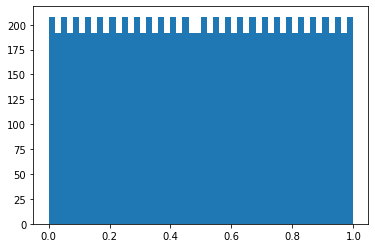

In [10]:
plt.hist(numbers,bins=50);

Sieht gut aus. 
Für alle Seeds sollte es gut funktionieren. $x_0$ bestimmt nur den Startpunkt in der Periode

### e)

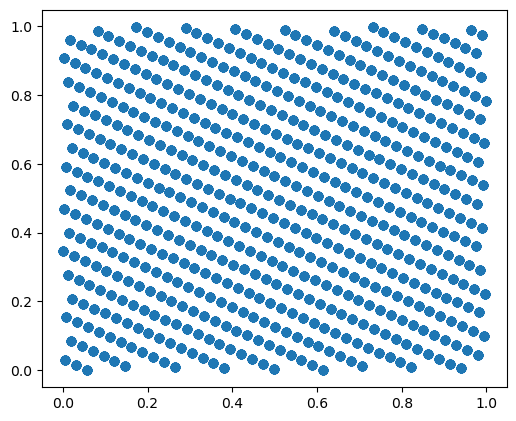

In [11]:
plt.figure(figsize=(6,5),dpi=100)
plt.scatter(numbers[:-1],numbers[1:]);

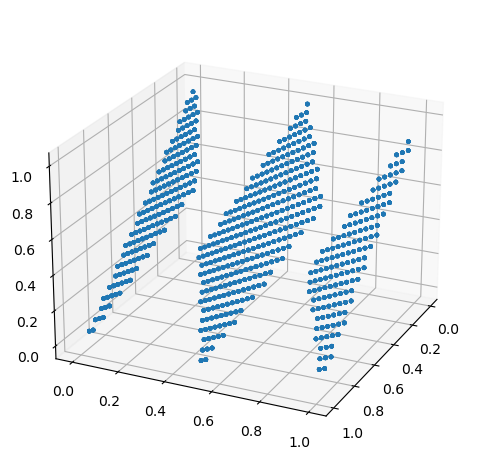

In [12]:
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(numbers[:-2],numbers[1:-1],numbers[2:],s=5)
ax.view_init(elev=23, azim=25)
plt.show()

Im 3d Spektraltest sieht man eine nicht gute Verteilung.

### f)

In [13]:
rng = np.random.default_rng()
numbers = rng.uniform(0,1,size=10000)

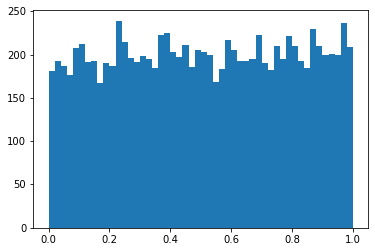

In [14]:
plt.hist(numbers,bins=50);

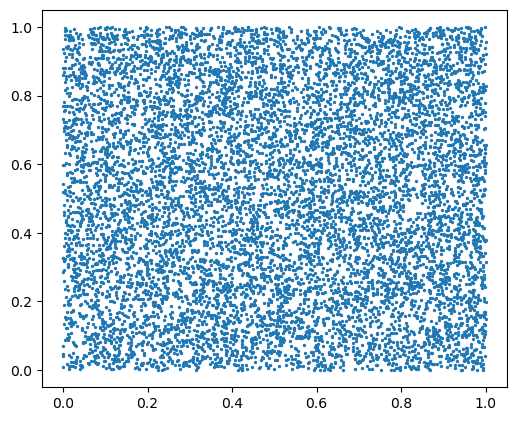

In [15]:
plt.figure(figsize=(6,5),dpi=100)
plt.scatter(numbers[:-1],numbers[1:],s=2);

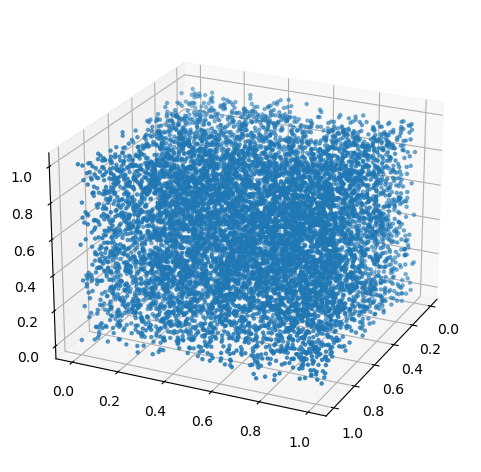

In [16]:
fig = plt.figure(figsize=(8,6),dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(numbers[:-2],numbers[1:-1],numbers[2:],s=5)
ax.view_init(elev=23, azim=25)
plt.show()

Der Numpy Random Number Generator ist deutlich besser verteilt.  
Allerdings ist beim Histogram die Anzahl der Werte nicht ganz so gleichmäßig verteilt.

# Aufgabe 6

In [17]:
PDF('distributions.pdf',size=(650,650))